In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.graph_objs as go
from ipywidgets import widgets, Button, VBox
from IPython.display import display
import seaborn as sns

In [2]:
text = "D:\\Code\\Projects\\Canada Visualization\\Canada.xlsx"

df_can = pd.read_excel(
    text,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data is ready!')

Data is ready!


In [3]:
print("Checking head")
df_can.head()

Checking head


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
print("Checking tail")
df_can.tail()

Checking tail


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


Let's go over all  the columns.

In [5]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

 Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG) and also rename columns so they make more sense. Also, changing all column name to type STRING for consistency.

In [6]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.columns = list(map(str, df_can.columns))
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Let's make the country column as the index to make looking up countries more easy. Furthermore, let's also add a Total column to get the total number of immigration from each country.

In [7]:
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [8]:
# Find the index of the column '1980' and the index of the column '2013'
start_year_index = df_can.columns.get_loc('1980')
end_year_index = df_can.columns.get_loc('2013') + 1  # Add 1 because the range is exclusive on the right

# Sum the values from '1980' to '2013' for each row
df_can['Total'] = df_can.iloc[:, start_year_index:end_year_index].sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Creating a list of all the years (1980 to 2013) so we can plot them more quickly.

In [9]:
years = list(map(str, range(1980, 2014)))
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Let's check the top 5 countries that had the most immigrations to Canada.

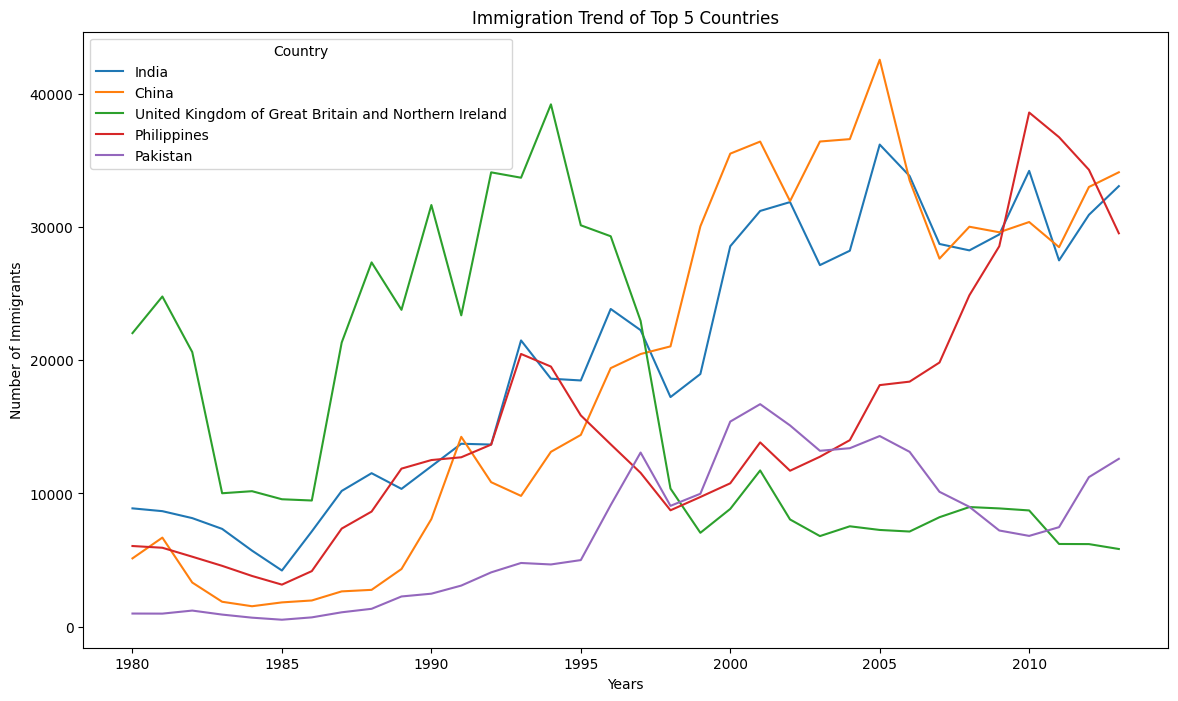

In [10]:
# We will sort the Total column to get our top 5 countries .
inplace = True # paramemter saves the changes to the original df_can dataframe
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head(5)

# transpose the dataframe
df_top5 = df_top5[years].transpose()

# Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size



plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')


plt.show()


This shows that UK had a spike in immigrations to Canada during 1994 and 1995, followed by a steep decline. Furthermore, both China and India follow a very similar increasing trend, with a peak in 2005.

Similarly, now let's check the same immigration trend to Canada by for the least 5 countries.

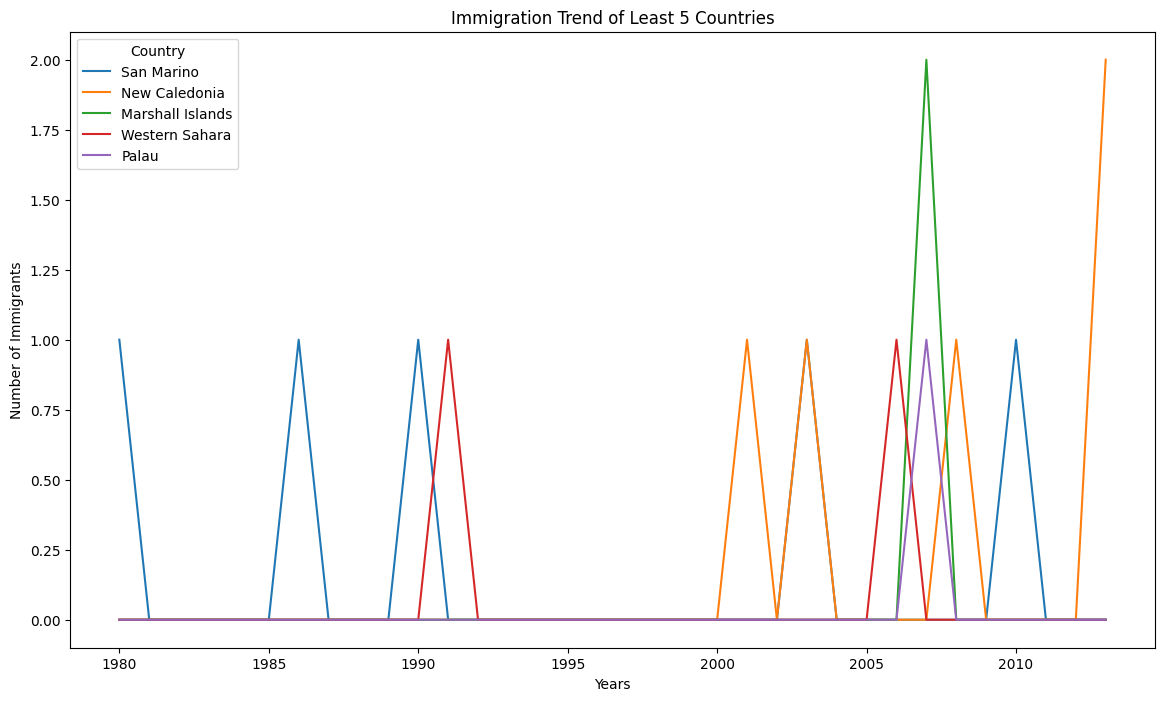

In [11]:
# get the least 5 entries
df_least5 = df_can.tail(5)

# transpose the dataframe
df_least5 = df_least5[years].transpose()

# Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5  to type integer for plotting
df_least5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size



plt.title('Immigration Trend of Least 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')


plt.show()

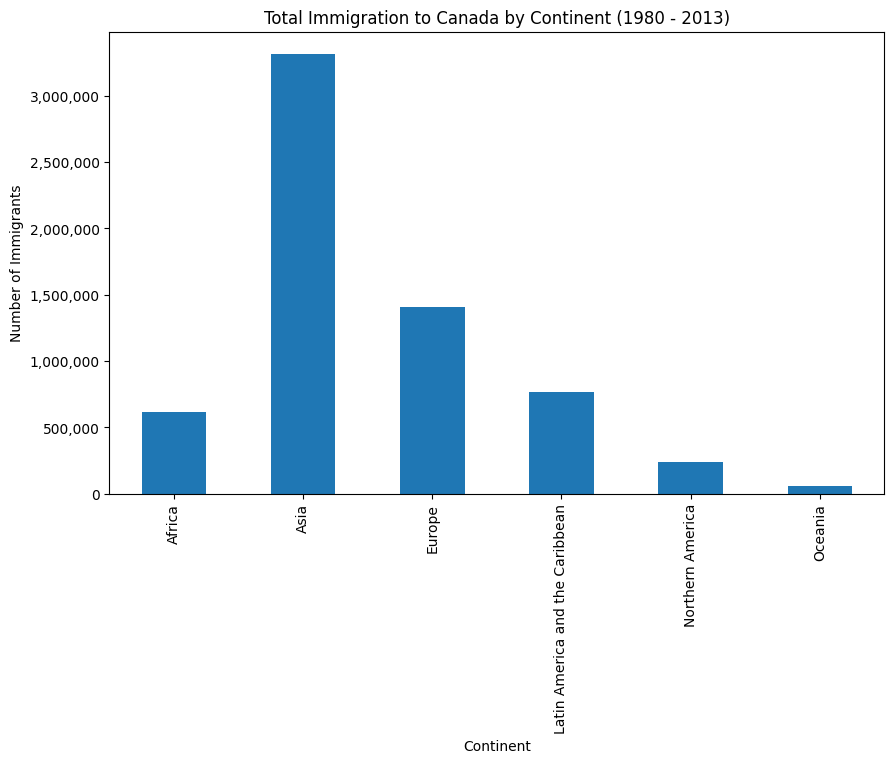

In [12]:
# Extract the 'Total' row which contains the sum of all years for each continent
total_immigration_by_continent = ((df_can.groupby('Continent').sum()).transpose()).loc['Total']
# total_immigration_by_continent
# Create a bar plot for the total immigration from each continent
total_immigration_by_continent.plot(kind='bar', figsize=(10, 6))

# Adding plot title and labels
plt.title('Total Immigration to Canada by Continent (1980 - 2013)')
plt.xlabel('Continent')
plt.ylabel('Number of Immigrants')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# Showing the plot
plt.show()


This is good, as it shows most immigrations are from Asia. But which regions of Asia? To figure this out, I'll create an interactive dashboard with drill down and roll up capabilties. As such, we can go from Continents > Region > Countries as well as Countries > Region > Continents for a better analysis.

In [13]:
# Prepare the data for the top-level continent view
df_continent = df_can.groupby('Continent')['Total'].sum().reset_index()


# Initialize global variables to keep track of the current and previous views
current_view = 'continent'
current_continent = None
current_region = None

# Initialize the figure widget with an empty bar chart
fig = go.FigureWidget(data=[go.Bar(x=[], y=[])], layout=go.Layout(title='Click on a continent to see regions'))

# Define the "Go Back" button but don't display it yet
back_button = Button(description="Go Back")
back_button.layout.visibility = 'hidden'  # Hide the back button initially

# Define the function to show continents
def show_continents(b=None):
    global current_view, current_continent, current_region
    current_view = 'continent'
    current_continent = None
    current_region = None
    df_continent = df_can.groupby('Continent')['Total'].sum().reset_index()
    with fig.batch_update():
        fig.data[0].x = df_continent['Continent']
        fig.data[0].y = df_continent['Total']
    fig.data[0].width = 0.4  # Adjust this value as needed
    fig.update_layout(
    title=dict(text='Click on a continent to see regions', x=0.5, xanchor='center'),
    xaxis=dict(title='Continents'),
    yaxis=dict(title='Immgrants To Canada'),
    margin=dict(l=40, r=40, t=40, b=100), # Adjust the margins as needed
    autosize=True
    )
    back_button.layout.visibility = 'hidden'  # Hide the back button

# Define the function to show regions for a continent
def show_regions(continent_name):
    global current_view, current_continent, current_region
    current_view = 'region'
    current_continent = continent_name
    current_region = None
    df_region = df_can[df_can['Continent'] == continent_name].groupby('Region')['Total'].sum().reset_index()
    with fig.batch_update():
        fig.data[0].x = df_region['Region']
        fig.data[0].y = df_region['Total']
    fig.data[0].width = 0.4  # Adjust this value as needed
    fig.update_layout(
    title=dict(text= f'Click on a region in {continent_name} to see countries', x=0.5, xanchor='center'),
    xaxis=dict(title='Region'),
    yaxis=dict(title='Immgrants To Canada'),
    margin=dict(l=40, r=40, t=40, b=100), # Adjust the margins as needed
    autosize=True
    )
    back_button.layout.visibility = 'visible'  # Show the back button

# Define the function to show countries for a region
def show_countries(region_name):
    global current_view, current_continent, current_region
    current_view = 'country'
    current_region = region_name
    df_country = df_can[df_can['Region'] == region_name].groupby('Country')['Total'].sum().reset_index()
    with fig.batch_update():
        fig.data[0].x = df_country['Country']
        fig.data[0].y = df_country['Total']
    fig.data[0].width = 0.4  # Adjust this value as needed
    fig.update_layout(
    title=dict(text= f'Click on a country in {region_name} to see details', x=0.5, xanchor='center'),
    xaxis=dict(title='Countries'),
    yaxis=dict(title='Immgrants To Canada'),
    margin=dict(l=40, r=40, t=40, b=100), # Adjust the margins as needed
    autosize=True
    )
    back_button.layout.visibility = 'visible'  # Show the back button

# Define the function to handle bar clicks
def on_bar_click(trace, points, selector):
    if points.point_inds:
        label = trace.x[points.point_inds[0]]
        if current_view == 'continent':
            show_regions(label)
        elif current_view == 'region':
            show_countries(label)

# Define the function to handle the 'Go Back' button click
def on_back_button_click(b):
    global current_view, current_continent, current_region
    if current_view == 'country':
        current_view = 'region'
        show_regions(current_continent)
    elif current_view == 'region':
        current_view = 'continent'
        show_continents()

# Bind the on_click event to the bar chart and button
fig.data[0].on_click(on_bar_click)
back_button.on_click(on_back_button_click)

# Display the initial continent view
show_continents()

# Layout the figure and the button in a vertical box
vbox = widgets.VBox([fig, back_button])

# Show the VBox in the output cell
display(vbox)


    'data': [{'type': 'bar',
              'uid': 'e674a234-36a1-4ea1-b8ce-fc13f…

Here is the interactive dashboard to compare total immigrations between Continents, Regions, and Countries - all at once. Once you are viewing the regions, you can click the Go Back button to roll up.

Now let's move on to finding countries with significant increases or decreases in immigration over certain periods. To do this, we need to define a threshold for significant increase/decrease and identify countries with changes beyond this threshold. This can be done by calculating the annual change for each country over the entire period and the mean annual change and standard deviation of these changes. From these statistics, we can define a threshold. 

4466.380139759875


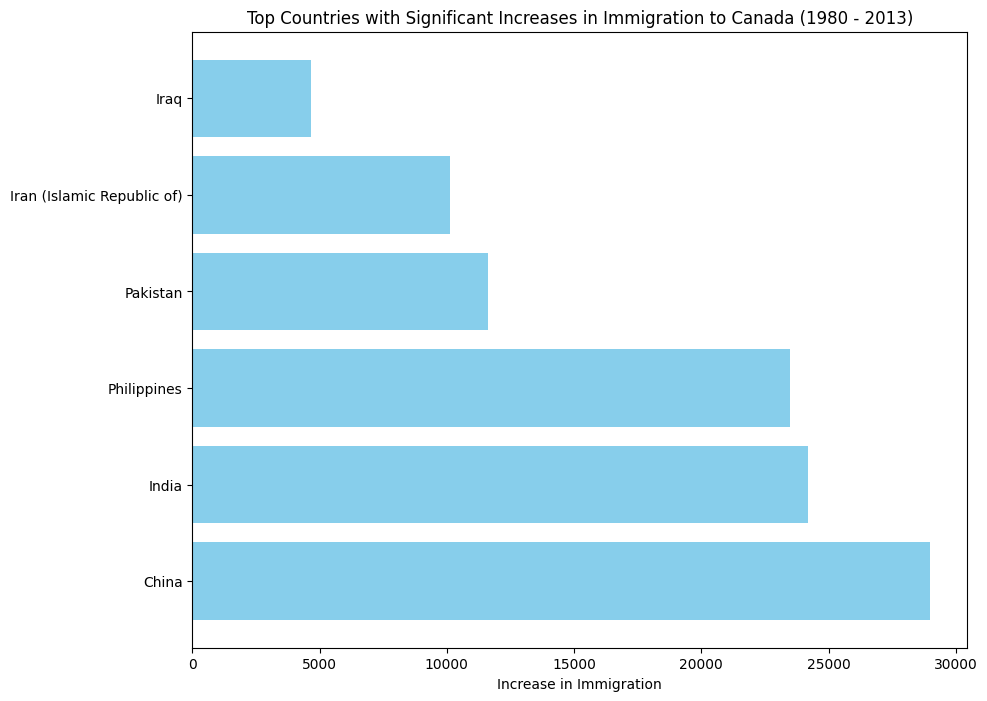

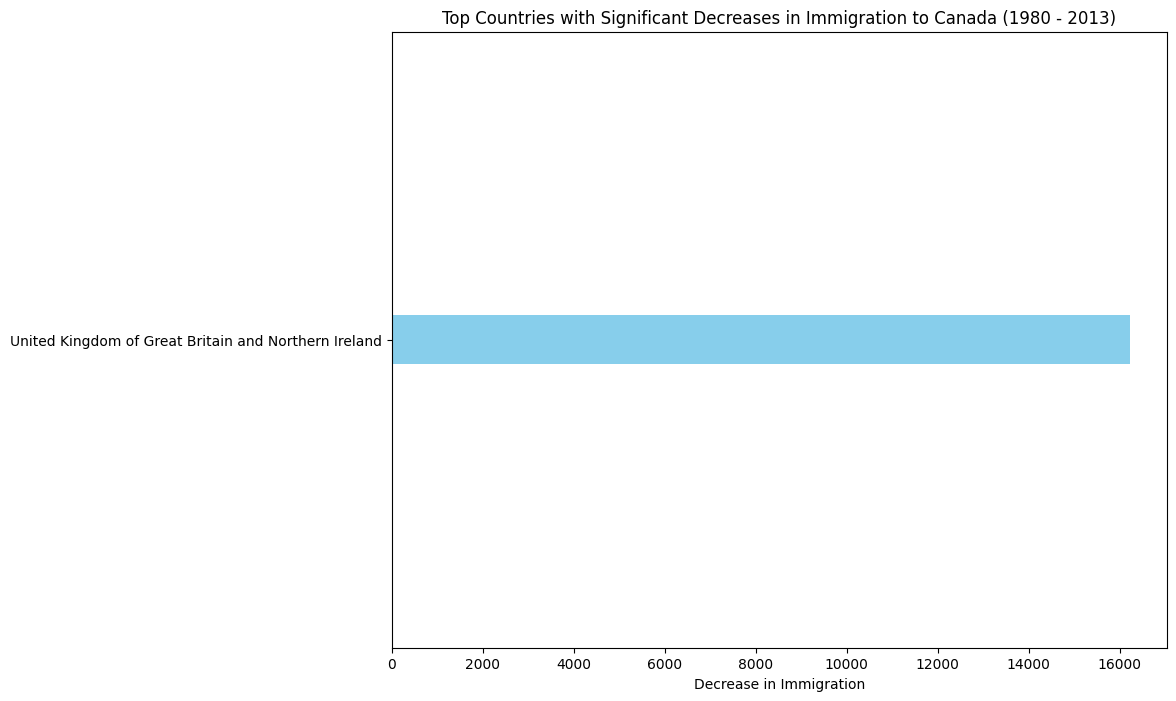

In [14]:
df_years = df_can[years]
# Calculate the change in immigration for each country from 1980 to 2013
df_can['Total_Change'] = df_can['2013'] - df_can['1980']

# Determine a significance threshold
# For example, let's say a significant change is a change greater than the mean plus/minus one standard deviation.
mean_change = df_can['Total_Change'].mean()
std_change = df_can['Total_Change'].std()
threshold = mean_change + std_change
print(threshold)
# Identify countries with significant increases
significant_increases = df_can[df_can['Total_Change'] >= threshold]

# Identify countries with significant decreases
significant_decreases = df_can[df_can['Total_Change'] <= -threshold]

# Sort the countries by change to see the most significant changes
significant_increases_sorted = significant_increases.sort_values(by='Total_Change', ascending=False)
significant_decreases_sorted = significant_decreases.sort_values(by='Total_Change')


# Visualize the top countries with significant increases
plt.figure(figsize=(10, 8))
plt.barh(significant_increases_sorted.index[:10], significant_increases_sorted['Total_Change'].head(10),color="skyblue")
plt.xlabel('Increase in Immigration')
plt.title('Top Countries with Significant Increases in Immigration to Canada (1980 - 2013)')
plt.show()

# Visualize the top countries with significant decreases
plt.figure(figsize=(10, 8))
plt.barh(significant_decreases_sorted.index[:10], -significant_decreases_sorted['Total_Change'].head(1),color="skyblue")
plt.xlabel('Decrease in Immigration')
plt.title('Top Countries with Significant Decreases in Immigration to Canada (1980 - 2013)')
plt.ylim(-5, 5)  # Setting the limits to -5 and 5 to center the bar
# Invert the order of categories manually
plt.gca().invert_yaxis()
plt.show()



After statistical analysis, the threshold for significant increase/decrease comes out to be 4466.380139759875. Based on this, China has the most significant increase from 1980 to 2013. Similarly, UK is the only country to go beyond the threshold, and that's why we are only visualizing it as the only country to have a significant decrease.


Let's create a heatmap to show density of immigrants across different (Top 5) countries over the years.


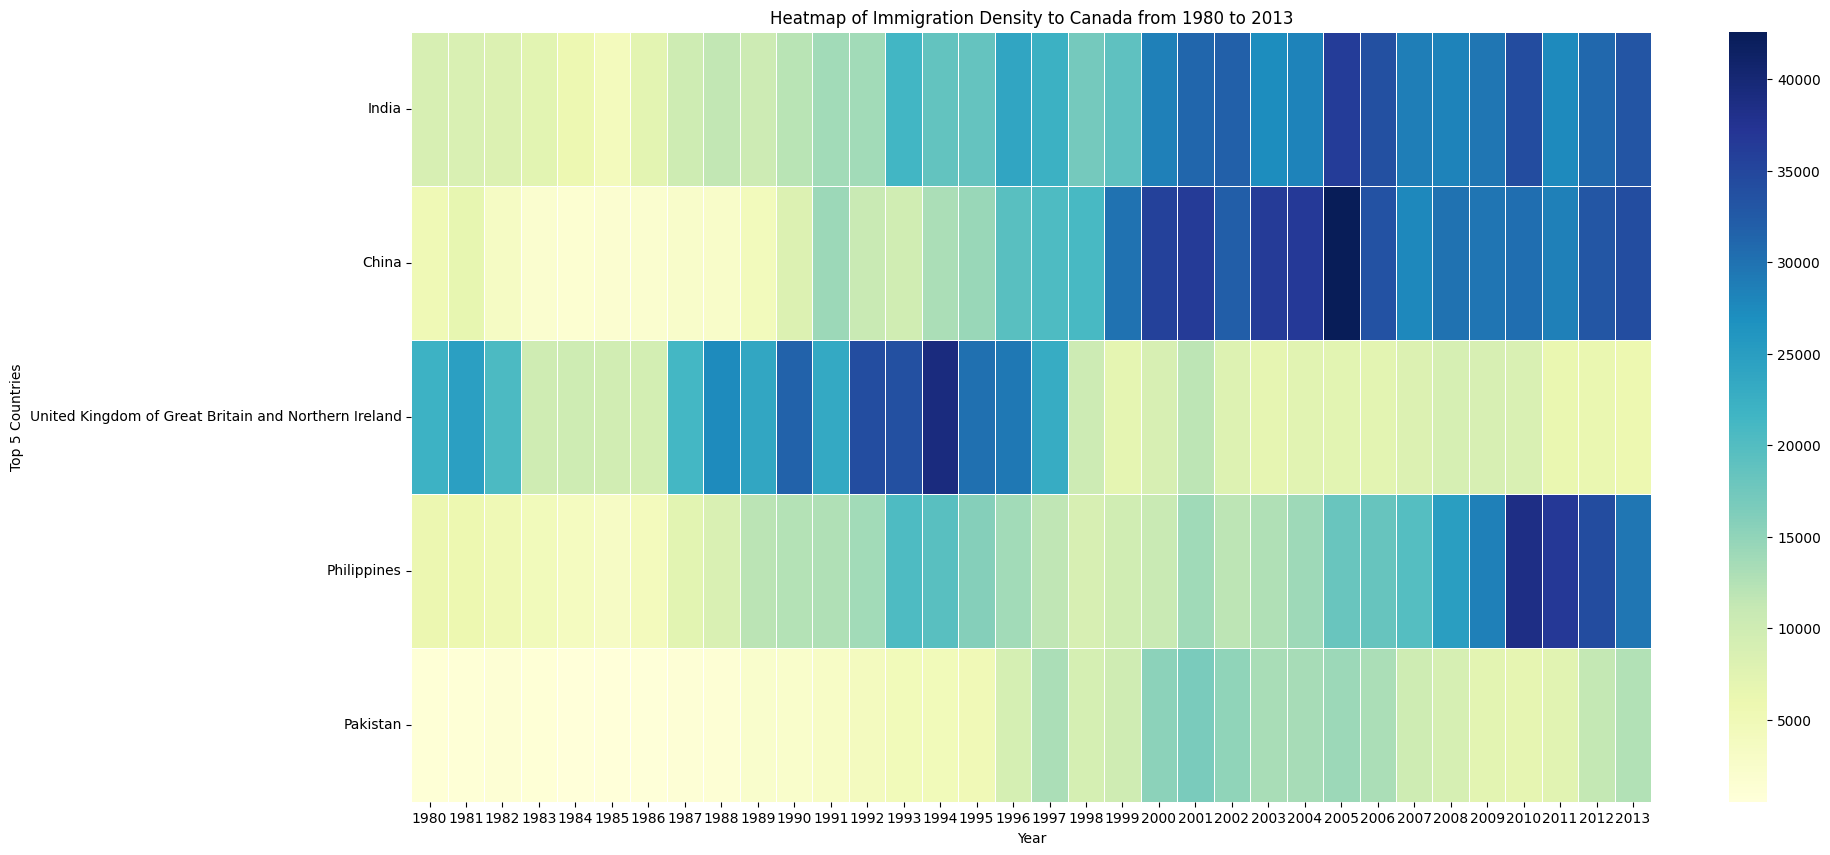

In [15]:
plt.figure(figsize=(20, 10)) 
sns.heatmap(df_can[years].head(), annot=False, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Immigration Density to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Top 5 Countries')
plt.show()

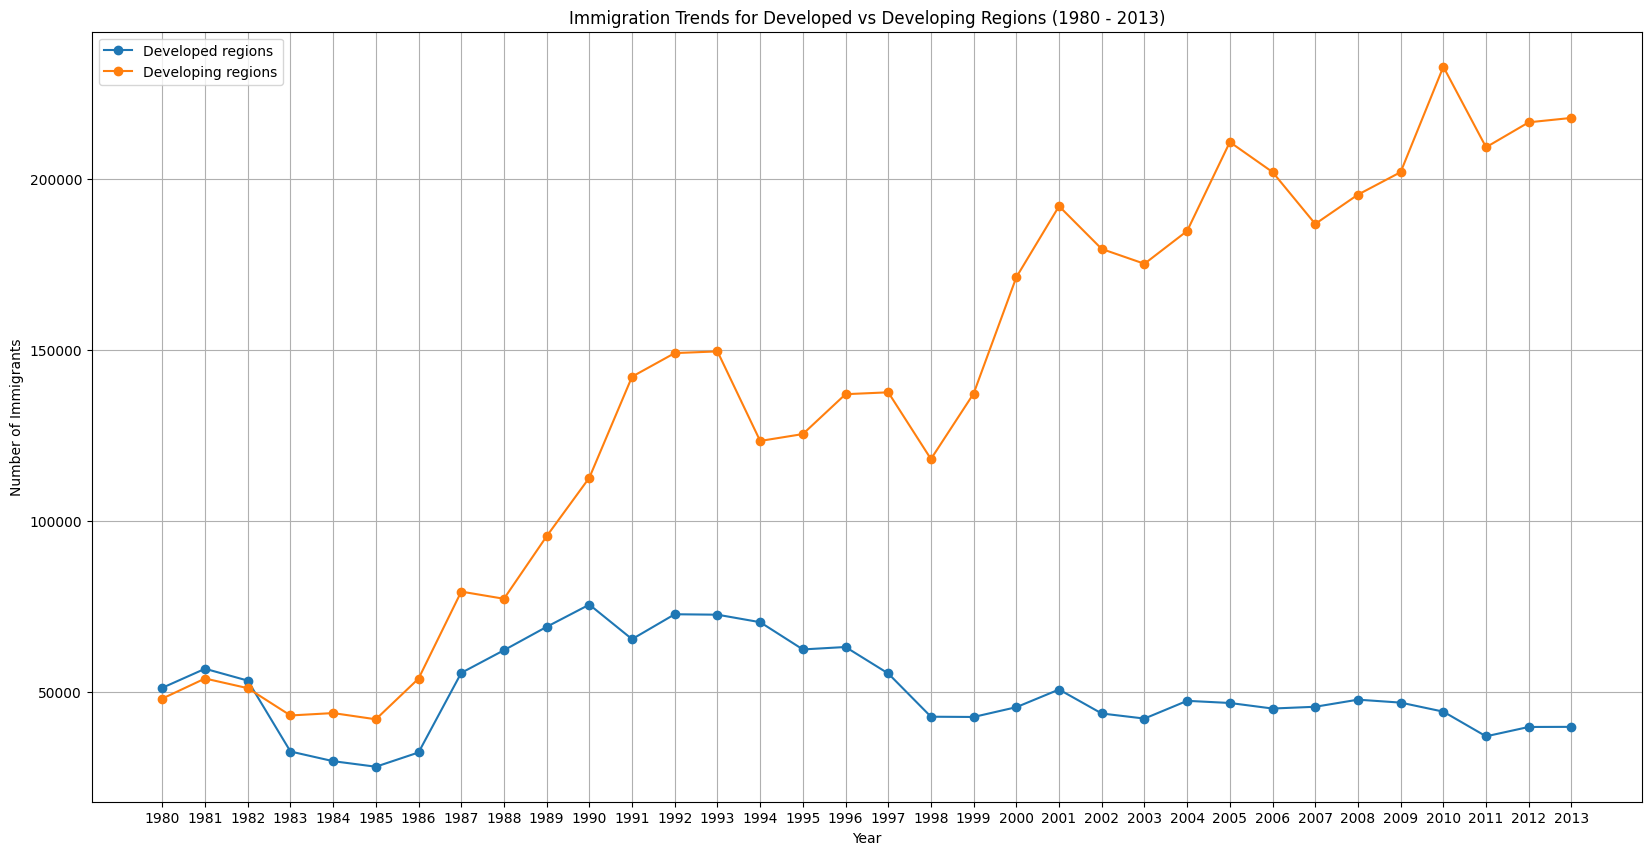

In [19]:
# Group the data by development status and sum the immigration numbers for each group per year
df_development = df_can.groupby('DevName')[years].sum().transpose()

# Plotting the trends for developed vs developing regions
plt.figure(figsize=(20, 10))
for dev_status in df_development.columns:
    plt.plot(df_development.index, df_development[dev_status], label=dev_status, marker='o')
plt.title('Immigration Trends for Developed vs Developing Regions (1980 - 2013)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.legend()
plt.grid(True)
plt.show()
